# Proyecto Semestral

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4895752%2F391fac1718d81b6c7cf0b53eb231d562%2Finbox_4895752_5e4735cb769c6be5f5872a052d0007e2_841520521_preview_20170113163124_2.jpg?generation=1597574096430659&alt=media)

## Integrantes

+ Ignacio Pardo Terán
+ Nombre integrante 2

## Entrega 1

### Carga data

In [ ]:
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2023-10-13 13:02:05--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/sst1u94436vqca6/demo_round_traces.csv [following]
--2023-10-13 13:02:06--  https://www.dropbox.com/s/raw/sst1u94436vqca6/demo_round_traces.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc105845b98d37f9c03b04a39bab.dl.dropboxusercontent.com/cd/0/inline/CFj0sFIFzEOxCpnIJdWEzScMdqZmiNRgPrdtS3WygrtzBM59fBsW0d6P5_YStpB8IWbOMKIEFMJwU34oerGQB3X1mlw3edHwWspRXym4ulp_h9uYqVbN_tJwQvQiDpoOQRmZBbl0ZxNckkmrqsMTjJCy/file# [following]
--2023-10-13 13:02:06--  https://uc105845b98d37f9c03b04a39bab.dl.dropboxusercontent.com/cd/0/inline/CFj0sFIFzEOxCpnIJdWEzScMdqZmiNRgPrdtS3WygrtzBM59fBsW0d6P5_YStpB8IWbOMKIEFMJ

### Descripción de la data

+ Map: Nombre del Mapa donde se jugó la partida
+ Team: Nombre de equipo al que pertenece el jugador
+ MatchId: Identificador de la partida
+ RoundId: Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)
+ SteamID: Identificador único del jugador
+ MatchId: Identificador de la partida
+ MatchWinner: Indica si el jugador ganó o no la partida.
+ RoundWinner: Indica si el jugador ganó o no la ronda analizada.
+ Survived: Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).
+ AbnormalMatch: Indica si la partida tuvo un error por conexión de red
+ TimeAlive: Indica el tiempo en segundos que el jugador estuvo vivo durante el juego
+ ScaledTimeAlive: Tiempo de vida del jugador escalado al tiempo de vida del jugador que más duró en la ronda.
+ AvgCentroidDistance: Distancia promedio del jugador al centroide del equipo.
+ TravelledDistance: Distancia promedio viajada por el jugador durante la partida.
+ AvgSiteDistance: Distancia promedio del jugador al objetivo más cercano.
+ AvgRoundVelocity: Velocidad promedio del jugador en la ronda.
+ AvgKillDistance: Distancia promedio viajada por el jugador antes de su primer kill.
+ RLethalGrenadesThrown/RNonLethalGrenadesThrown: Cantidad de granadas lanzadas, categorizadas en letales
y no-letales.
+ PrimaryXXXX: Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG,
Heavy y Pistol.
+ [Match|Round] Assists: Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.
+ [Match|Round] Kills: Cantidad de kills efectuados por el jugador durante la partida o la ronda.
+ [Match|Round] FlankKills: Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la
partida o la ronda.
+ [Match|Round] HeadShots: Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante
la partida o la ronda.
+ RoundStartingEquipmentValue: Valor del equipamiento llevado por el jugador al inicio de la ronda.
+ TeamStartingEquipmentValue: Valor promedio del equipamiento llevado por el equipo del jugador al inicio de
la ronda.
+ AvgMatchKillDist: Distancia promedio viajada por el jugador entre kills.

### Entendiendo los datos

Definición de  preguntas  que ayudan  a  conocer  el conjunto de datos:

+ Pregunta 1: ¿Existe alguna relación entre el equipo de los jugadores (Terrorist y CounterTerrorist) con la cantidad de victorias, considerando que se encuentran en el mapa de Dust2?

+ Pregunta 2: ¿Influye el valor del equipamiento llevado por el equipo Terrorist al inicio de la ronda en la cantidad de asesinatos totales en una ronda, en el mapa de Nuke?

+ Pregunta 3: ¿Existe alguna relación entre el tiempo promedio que un jugador estuvo vivo durante la partida (promedio de TimeAlive en la partida) y la velocidad promedio que tuvo en esa partida (promedio de AvgRoundVelocity en la partida), en el mapa de Mirage?

+ Pregunta 4: ¿Quién tiene más victorias de los dos equipos (CounterTerrorist o Terrorist), en aquellas partidas en que se usaron pistolas (PrimaryPistol)?

In [ ]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
# Carga y visualización del dataset
data_frame = pd.read_csv("demo_round_traces.csv", sep=';')
pd.set_option('display.max_columns', None)
data_frame.sample(5)


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
55845,84127,de_nuke,CounterTerrorist,2,346,14,76561197972003061,False,True,True,False,50.257013,1.000000,2.778611e+06,85673.994520,106.692397,0.000000e+00,2.007154e+06,1,2,1.0,0.0,0.0,0.0,0,50.006977,0,0,0,0,5700,29150,8,2,3,5,6.952031e+05
5425,7726,de_mirage,CounterTerrorist,2,33,2,76561197973845818,False,False,False,False,52.368732,0.777159,3.683961e+05,72797.425791,87.078261,4.174593e+04,1.291219e+06,1,0,1.0,0.0,0.0,0.0,0,50.429150,1,1,0,0,3750,17250,2,0,1,0,1.012462e+06
40298,57720,de_inferno,CounterTerrorist,1,239,19,76561198000782895,False,False,True,False,131.920399,1.000000,8.469338e+05,220916.753243,104.848957,7.424066e+05,3.343266e+06,1,2,1.0,0.0,0.0,0.0,0,121.531982,1,0,0,0,5500,27950,9,1,2,7,5.968633e+05
20100,31141,de_inferno,Terrorist,1,130,2,76561198013603966,False,True,True,False,92.011393,1.000000,7.859265e+05,89929.749051,61.176700,1.382823e+06,3.484956e+06,1,1,1.0,0.0,0.0,0.0,0,76.749140,1,0,0,0,4400,23300,3,0,0,1,4.646386e+05
65133,104016,de_mirage,CounterTerrorist,2,428,3,76561197983695262,False,False,True,False,43.196945,1.000000,7.958671e+05,68146.660910,98.763277,7.006207e+05,1.401624e+06,0,1,1.0,0.0,0.0,0.0,0,36.507984,2,0,2,0,5050,27900,3,0,0,3,6.307994e+05


In [ ]:
(data_frame.PrimaryAssaultRifle.unique())

array([0.        , 1.        , 0.76213592, ..., 0.33451327, 0.72428884,
       0.95052632])

In [ ]:
# Tamaño del dataset
data_frame.shape

(79157, 37)

In [ ]:
# Información de variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

Con lo anterior se puede ver que existen 31 variables cuantitativas (datos de tipo int64 y float64) y 6 variables cualitativas (de tipo object y bool).

In [ ]:
# Obtiene cuales son las variables numéricas
numeric_features = data_frame.describe().columns
print(numeric_features)

Index(['Unnamed: 0', 'InternalTeamId', 'MatchId', 'RoundId', 'SteamId',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist'],
      dtype='object')


In [ ]:
# Verificación de datos nulos
data_frame.isnull().sum()

Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
SteamId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
ScaledTimeAlive                0
AvgCentroidDistance            0
TravelledDistance              0
AvgRoundVelocity               0
AvgKillDistance                0
AvgSiteDistance                0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStart

No es necesario hacer un tratamiento de datos nulos, ya que en este dataset toda la información esta completa

# Análisis exploratorio

### Pregunta 1: ¿Existe alguna relación entre el equipo de los jugadores (Terrorist y CounterTerrorist) con la cantidad de victorias, considerando que se encuentran en el mapa de Dust2?

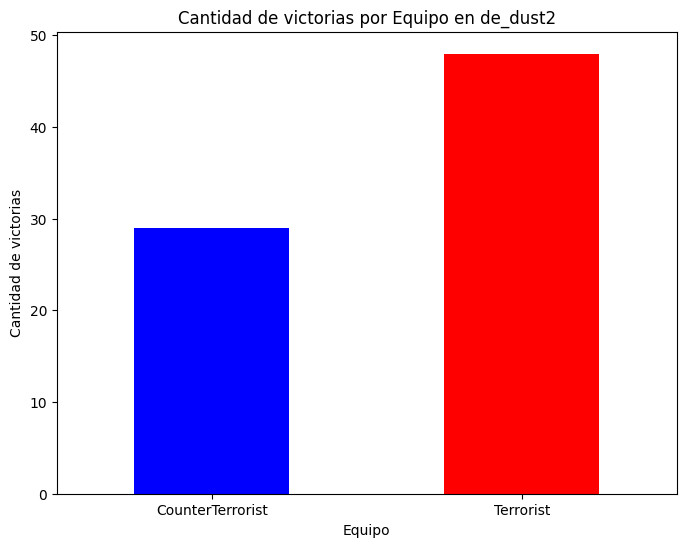

Team
CounterTerrorist    29
Terrorist           48
Name: MatchWinner, dtype: int64


In [ ]:
# Filtrar datos para el mapa de de_inferno y los equipos terrorist y conterterrorist
filtered_data = data_frame[(data_frame['Map'] == 'de_dust2')]

# Filtramos las partidas para que solo haya un dato que representa esta misma, es decir, no haya partidas duplicadas,
# ya que solo nos interesa si en esa partida gano el equipo Terrorist o CounterTerrorist
sin_duplicados = filtered_data.drop_duplicates(['Team', 'MatchId'], keep='first')

# Calcular la cantidad de victorias para cada equipo
wins_by_team = sin_duplicados.groupby('Team')['MatchWinner'].sum()

# Graficar los datos
plt.figure(figsize=(8, 6))
wins_by_team.plot(kind='bar', color=['blue', 'red'])

# Personalización del gráfico
plt.xlabel('Equipo')
plt.ylabel('Cantidad de victorias')
plt.title('Cantidad de victorias por Equipo en de_dust2')
plt.xticks(rotation=0)  # Para mantener los nombres de los equipos en el eje x
plt.show()

print(wins_by_team)

Teniendo en cuenta lo anterior, en donde el equipo de CounterTerrorist tiene 29 victorias en partidas diferentes (37.662%), superado por el equipo Terrorist con un total de 48 victorias (62.338%) en el mapa de Dust2, aunque no son muchos datos se puede decir que hay una tendencia en donde el equipo Terrorist tiene un 24.672% más de victorias.

### Pregunta 2: ¿Influye el valor del equipamiento llevado por el equipo Terrorist al inicio de la ronda en la cantidad de asesinatos totales en una ronda, en el mapa de Nuke?

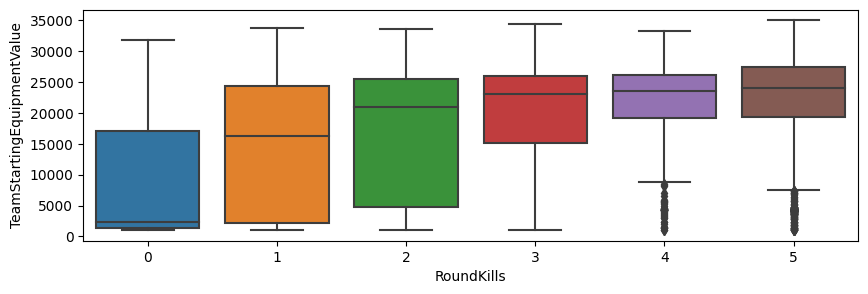

In [ ]:
# Filtrar datos para el mapa de de_inferno y el bando de terrorist
filtered_data_ = data_frame[(data_frame['Map'] == 'de_nuke') & (data_frame['Team'] == 'Terrorist')]

# Hacemos una limpieza en donde sumaremos las kills de todos los miembros del equipo por cada ronda, por lo que el jugador
# que representa esta información es irrelevante, ya que posee estadisticas del equipo en general
kills_por_ronda = filtered_data.groupby(['MatchId','RoundId', 'Team', 'TeamStartingEquipmentValue'])['RoundKills'].sum().reset_index()

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,1,1)
sns.boxplot(x=kills_por_ronda['RoundKills'],y=kills_por_ronda['TeamStartingEquipmentValue']);

Con lo anterior se puede ver que el valor del equipamiento del equipo Terrorist influye en la cantidad de kills por ronda, ya que mientras aumenta la cantidad de kills en el equipo, el diagrama de cajas también sube, reflejando que es más fácil obtener kills con mejor equipo.

Existen valores atípicos, esto puede ser ya que en las primeras rondas de una partida el valor del equipo es más bajo. Otro posible caso es que como hay algunos filas del dataset, en donde la cantidad de jugadores por equipo no son iguales (por ejemplo, en un equipo 6 y otro 4) haya algunos datos que no deberían estar normalmente.

In [ ]:
#############Prueba de error en el dataset, preguntar a profesora

# Filtrar datos para el mapa de de_inferno
filtered_data = data_frame[(data_frame['Map'] == 'de_nuke')]

atipico = filtered_data[(filtered_data['MatchId'] == 6) & (filtered_data['RoundId'] == 8)]

# Ejemplo con el error de asignación de Team
atipico[['Map', 'Team', 'MatchId', 'RoundId','RoundKills', 'TeamStartingEquipmentValue', 'MatchKills']]

,Map,Team,MatchId,RoundId,RoundKills,TeamStartingEquipmentValue,MatchKills
300,de_nuke,Terrorist,6,8,0,9200,6
301,de_nuke,Terrorist,6,8,0,9200,8
302,de_nuke,Terrorist,6,8,0,9200,0
303,de_nuke,Terrorist,6,8,0,9200,0
304,de_nuke,CounterTerrorist,6,8,0,9200,0
305,de_nuke,CounterTerrorist,6,8,0,800,3
306,de_nuke,CounterTerrorist,6,8,0,800,0
307,de_nuke,CounterTerrorist,6,8,0,800,1
308,de_nuke,CounterTerrorist,6,8,0,800,1
309,de_nuke,CounterTerrorist,6,8,0,800,0


En la tabla anterior se puede ver que hay 6 CounterTerrorist y 4 Terrorist, en donde uno de los CounterTerrorist tiene 9200 de TeamStartingEquipmentValue, lo que coincide con el equipo contrario, por ende se deduce que hay un error en donde realmente este jugador debe de ser Terrorist. El ejemplo anterior es uno especifico que se encontro en el dataset, pero no es el único (este error puede ser aplicable para cada pregunta).

### Pregunta 3: ¿Existe alguna relación entre el tiempo promedio que un jugador estuvo vivo durante la partida (promedio de TimeAlive en la partida) y la velocidad promedio que tuvo en esa partida (promedio de AvgRoundVelocity en la partida), en el mapa de Mirage?

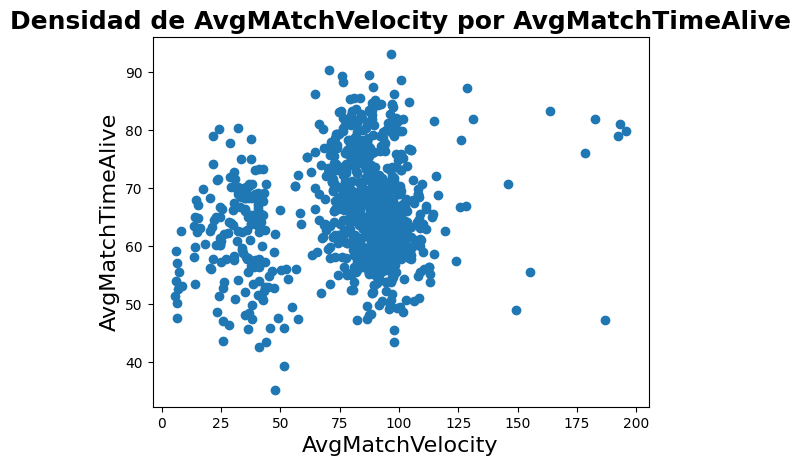

In [ ]:
# Extracción de datos de interes
# TimeAlive y MatchHeadShots son los importantes
filtered_data = data_frame[['Map', 'MatchId', 'SteamId', 'TimeAlive', 'AvgRoundVelocity']]

# Filtrado por el mapa de la partida
filtered_data = filtered_data[(filtered_data['Map'] == 'de_mirage')]
# Calculo del promedio de TimeAlive y AvgRoundVelocity, para cada jugador en cada partida distinta
filtered_data = filtered_data.groupby(['MatchId','SteamId'])[['TimeAlive', 'AvgRoundVelocity']].mean()
# Filtrado de 9 puntos atípicos, los cuales no dejan analizar claramente el gráfico de densidad
filtered_data = filtered_data[(filtered_data['TimeAlive'] < 100)]

# Gráfico de densidad de edades
# variables a utilizar
x_values = filtered_data.AvgRoundVelocity
y_values = filtered_data.TimeAlive

# Creación del gráfico
plt.scatter(x_values, y_values, marker='o');
plt.title('Densidad de AvgMAtchVelocity por AvgMatchTimeAlive', fontsize=18, fontweight="bold")
plt.xlabel('AvgMatchVelocity', fontsize=16)
plt.ylabel('AvgMatchTimeAlive', fontsize=16)
plt.show()


A partir del gráfico de densidad anterior, no se puede deducir una relación directa entre la velocidad promedio de cada jugador en una partida por el tiempo promedio de vida del mismo jugador, en el mapa de Mirage. Eso si, entre el rango de velocidad de 0 a 50 se forma una agrupación de puntos, en donde si se compara con la agrupación de puntos entre las velocidades de 75 a 125 aprox, esta última tiende a tener un promedio de vida mayor en la partida.

### Pregunta 4: ¿Quién tiene más victorias de los dos equipos (CounterTerrorist o Terrorist), en aquellas partidas en que se usaron pistolas (PrimaryPistol)?


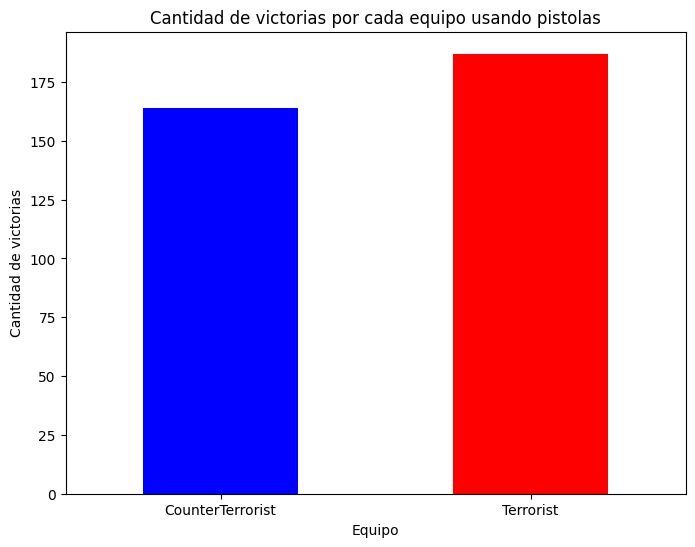

Team
CounterTerrorist    164
Terrorist           187
Name: MatchWinner, dtype: int64


In [ ]:
# Filtrar datos para las variables de interes
filtered_data = data_frame[['Team', 'MatchId', 'MatchWinner', 'PrimaryPistol']]
# Filtrar partidas en donde se usaron pistolas
filtered_data = filtered_data[(filtered_data['PrimaryPistol'] > 0)]
# Eliminación de partidas duplicadas, ya que nos interesa solo un ejemplo por partida
# (una partida con un MatchId único)
filtered_data = filtered_data.drop_duplicates(['Team', 'MatchId'], keep='first')

# Calcular la cantidad de victorias para cada equipo
wins_by_team = filtered_data.groupby('Team')['MatchWinner'].sum()

# Graficar los datos
plt.figure(figsize=(8, 6))
wins_by_team.plot(kind='bar', color=['blue', 'red'])

# Personalización del gráfico
plt.xlabel('Equipo')
plt.ylabel('Cantidad de victorias')
plt.title('Cantidad de victorias por cada equipo usando pistolas')
plt.xticks(rotation=0)  # Para mantener los nombres de los equipos en el eje x
plt.show()

print(wins_by_team)

Con el anterior gráfico se puede analizar que considerando las partidas en donde el arma principal en ciertas rondas fue la pistola, el equipo Terrorist consigue una mayor cantidad de victorias (187) sobre el equipo CounterTerrorist (164).

### Preparación de los datos


Se copiará el data_frame a data_frame2, en este se realizará la transformación de datos y se aplicará una regreción lineal.

In [ ]:
# Copia del dataset
data_frame2 = data_frame

data_frame2.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,False,51.120249,0.962309,322909.131476,100831.407375,123.567901,0.0,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,False,43.486626,0.818610,547137.458474,60960.883185,87.839889,0.0,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,False,37.354698,0.703180,0.000000,56422.523836,94.668664,0.0,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,False,47.678861,0.897527,768923.179642,89634.733132,117.785457,0.0,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,False,53.122511,1.000000,202397.446775,108656.497344,128.132662,0.0,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,254527.691176


In [ ]:
# Ánalisis de variables categoricas
data_frame2.columns[data_frame2.dtypes == 'object']

Index(['Map', 'Team'], dtype='object')

In [ ]:
# Todas las opciones de cada variable categorica
for column in data_frame2.columns[data_frame2.dtypes == 'object']:
  print(column,"->",data_frame2[column].unique())

Map -> ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']
Team -> ['Terrorist' 'CounterTerrorist']


Viendo que las variables categóricas no siguen ningún tipo de orden categórico, entonces se decidió tratar estas variables con el método one-hot encoding, de esta manera, cada registro queda representado por un vector binario que indica la presencia o ausencia de cada valor categórico, y se evita la posibilidad de que los algoritmos malinterpreten los valores numéricos asignados por Label Encoding.

In [ ]:
# Codificando Map usando ONE-HOT ENCODER
data_transform = pd.get_dummies(data_frame2.Map)
data_frame2 = pd.concat([data_frame2, data_transform], axis=1)
data_frame2.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist,de_dust2,de_inferno,de_mirage,de_nuke
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,False,51.120249,0.962309,322909.131476,100831.407375,123.567901,0.0,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,501379.183091,0,1,0,0
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,False,43.486626,0.818610,547137.458474,60960.883185,87.839889,0.0,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,208807.587297,0,1,0,0
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,False,37.354698,0.703180,0.000000,56422.523836,94.668664,0.0,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,381652.027911,0,1,0,0
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,False,47.678861,0.897527,768923.179642,89634.733132,117.785457,0.0,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,289754.503091,0,1,0,0
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,False,53.122511,1.000000,202397.446775,108656.497344,128.132662,0.0,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,254527.691176,0,1,0,0


In [ ]:
# Codificando Team usando ONE-HOT ENCODER
data_transform = pd.get_dummies(data_frame2.Team)
data_frame2 = pd.concat([data_frame2, data_transform], axis=1)
data_frame2.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist,de_dust2,de_inferno,de_mirage,de_nuke,CounterTerrorist,Terrorist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,False,51.120249,0.962309,322909.131476,100831.407375,123.567901,0.0,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,501379.183091,0,1,0,0,0,1
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,False,43.486626,0.818610,547137.458474,60960.883185,87.839889,0.0,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,208807.587297,0,1,0,0,0,1
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,False,37.354698,0.703180,0.000000,56422.523836,94.668664,0.0,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,381652.027911,0,1,0,0,0,1
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,False,47.678861,0.897527,768923.179642,89634.733132,117.785457,0.0,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,289754.503091,0,1,0,0,0,1
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,False,53.122511,1.000000,202397.446775,108656.497344,128.132662,0.0,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,254527.691176,0,1,0,0,0,1


In [ ]:
# Ánalisis de variables cuantitativas continuas
data_frame2.columns[data_frame2.dtypes == 'float64']

Index(['TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'FirstKillTime', 'AvgMatchKillDist'],
      dtype='object')

Observando las variables cuantitativas continuas que posee el data_frame, se escoge el PrimaryAssaultRifle, para ver si hay otras variables que hagan que el jugador prefiera comprar esta arma por sobre las demás en una partida.

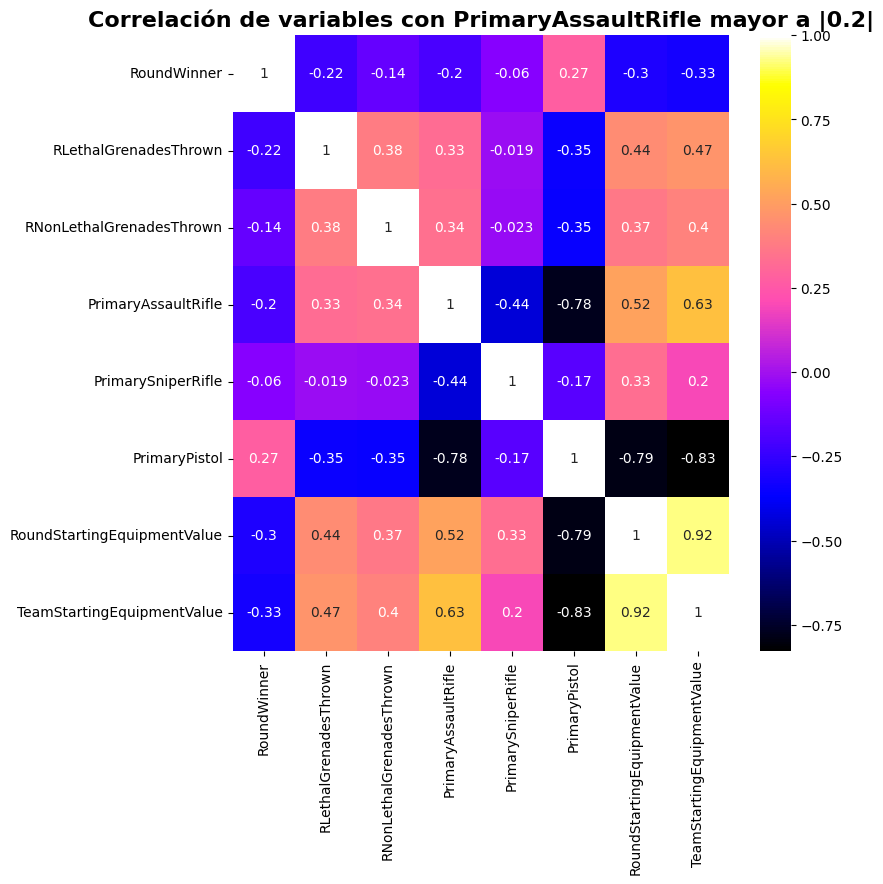

In [ ]:
# Calcula las correlaciones entre todas las variables y PrimaryAssaultRifle
correlations = data_frame2.corrwith(data_frame2['PrimaryAssaultRifle'], numeric_only=True)

# Filtra las correlaciones mayores a |0.2|
filtered_correlations = correlations[abs(correlations) > 0.2]

# Filtra el DataFrame original para incluir solo las columnas con correlaciones mayores a |0.2|
filtered_data_frame = data_frame2[filtered_correlations.index]

# Crea el mapa de calor con las correlaciones filtradas
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(filtered_data_frame.corr(), annot=True, cmap='gnuplot2')
plt.title("Correlación de variables con PrimaryAssaultRifle mayor a |0.2|", fontsize=16, fontweight="bold")
plt.show()

Considerando la variable objetivo (PrimaryAssaultRifle) es posible apreciar que las variables de TeamStartingValue (mayor correlacion positiva) y PrimaryPistol (mayor correlación negativa) tienen un indice alto; por ende, pueden ser buenas variables predictorias.

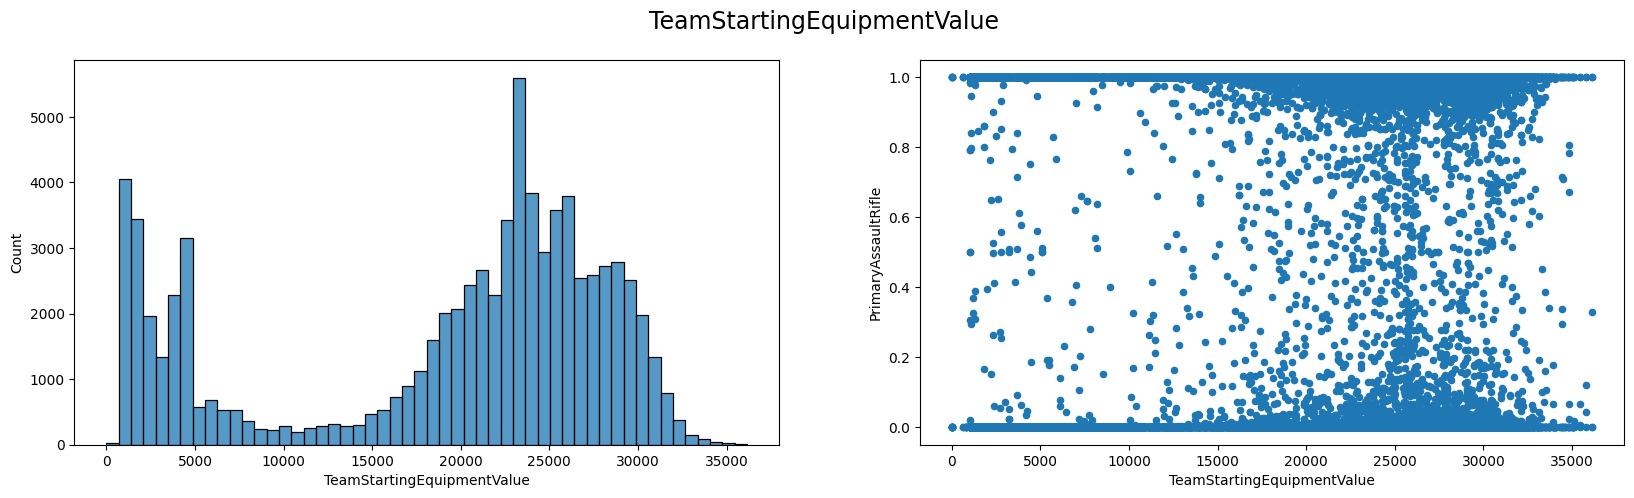

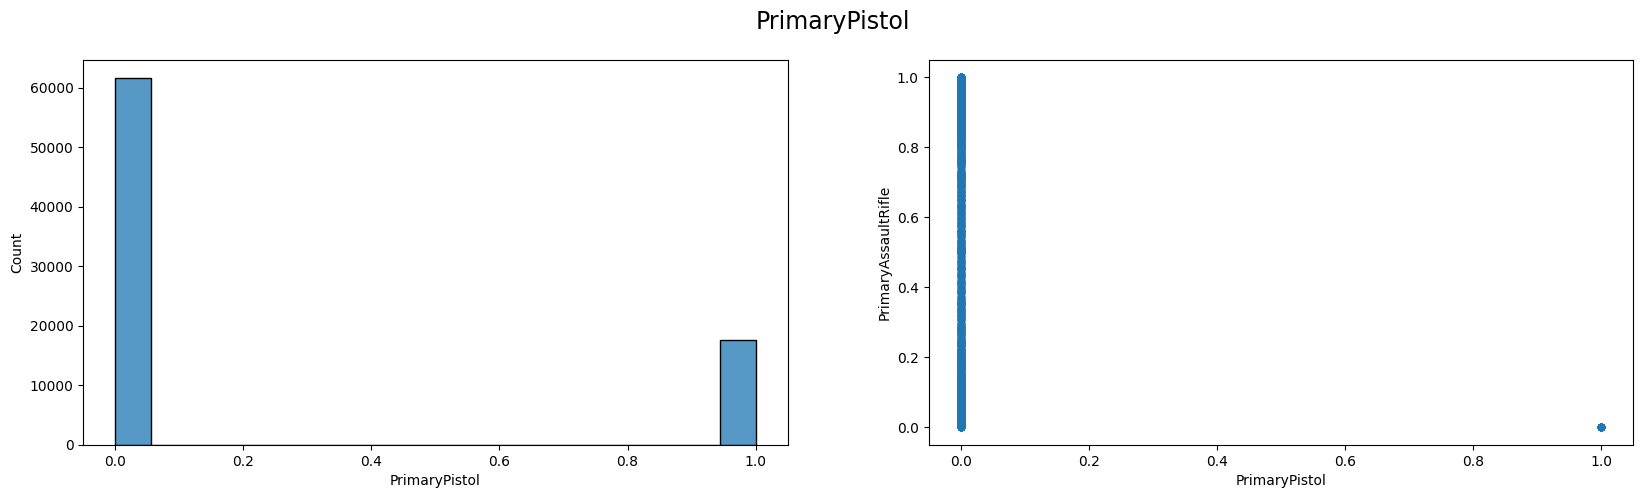

In [ ]:
# Analisis de las variables con PrimaryAssaultRifle
for col in ['TeamStartingEquipmentValue', 'PrimaryPistol']:
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  fig.suptitle(col, fontsize=17)
  sns.histplot(data_frame2[col], ax=ax[0], kde=False)
  data_frame2[[col]+['PrimaryAssaultRifle']].plot.scatter(x=col, y='PrimaryAssaultRifle', ax=ax[1])
  plt.show()

Ahora se hará la predicción del porcentaje de uso de un Rifle de Asalto como arma primaria a partir de las 2 variables independientes.

In [ ]:
# Se separan las variables predictoras y la predecida
X = data_frame2[['TeamStartingEquipmentValue', 'PrimaryPistol']] # Variables independientes
y = data_frame2['PrimaryAssaultRifle'] # Variable dependiente

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
# Creación de modelo
modelo = LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)

In [ ]:
# Evaluación del modelo
print("R2 : %.5f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))
print("Score del modelo en entrenamiento : %.2f" % modelo.score(X_train, y_train))
print("Score del modelo en test : %.5f" % modelo.score(X_test, y_test))

R2 : 0.61116
MSE: 0.08
MAE: 0.17
Score del modelo en entrenamiento : 0.60
Score del modelo en test : 0.61116


Se intenará mejorar el modelo agregando más variables independientes, en este caso se agregará RoundStartingEquipmentValue y luego PrimarySniperRifle.

In [ ]:
history_mae = []
history_mae.append(mean_absolute_error(y_pred, y_test))

In [ ]:
history_r2 = []
history_r2.append(modelo.score(X_train, y_train))

### Predicción de PrimaryAssaultRifle considerando: TeamStartingEquipmentValue, PrimaryPistol y RoundStartingEquipmentValue.

In [ ]:
# Se separan las variables predictoras y la predecida
X = data_frame2[['TeamStartingEquipmentValue', 'PrimaryPistol',
                 'RoundStartingEquipmentValue']] # Variables independientes
y = data_frame2['PrimaryAssaultRifle'] # Variable dependiente

In [ ]:
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X, y, test_size=0.2, random_state=29)
# Creación de modelo
modelo_x = LinearRegression()
# Entrenamiento del modelo
modelo_x.fit(X_train_x, y_train_x)
# Validación del modelo
y_pred_x = modelo_x.predict(X_test_x)

In [ ]:
# Evaluación del modelo
print("R2 : %.5f" % r2_score(y_test_x, y_pred_x))
print("MSE: %.2f" % mean_squared_error(y_pred_x, y_test_x))
print("MAE: %.2f" % mean_absolute_error(y_pred_x, y_test_x))
print("Score del modelo en entrenamiento : %.2f" % modelo_x.score(X_train_x, y_train_x))
print("Score del modelo en test : %.5f" % modelo_x.score(X_test_x, y_test_x))

R2 : 0.65600
MSE: 0.07
MAE: 0.17
Score del modelo en entrenamiento : 0.65
Score del modelo en test : 0.65600


Conclusión: A partir de lo anterior se puede apreciar que incluyendo esta nueva variable (RoundStartingEquipmentValue) la calidad de predicción del código mejoró un poco.

In [ ]:
history_mae.append(mean_absolute_error(y_pred_x, y_test_x))

In [ ]:
history_r2.append(modelo_x.score(X_train_x, y_train_x))

### Predicción de PrimaryAssaultRifle considerando: TeamStartingEquipmentValue, PrimaryPistol, RoundStartingEquipmentValue y PrimarySniperRifle.

In [ ]:
# Se separan las variables predictoras y la predecida
X = data_frame2[['TeamStartingEquipmentValue', 'PrimaryPistol',
                 'RoundStartingEquipmentValue', 'PrimarySniperRifle']] # Variables independientes
y = data_frame2['PrimaryAssaultRifle'] # Variable dependiente

In [ ]:
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(X, y, test_size=0.2, random_state=29)
# Creación de modelo
modelo_y = LinearRegression()
# Entrenamiento del modelo
modelo_y.fit(X_train_y, y_train_y)
# Validación del modelo
y_pred_y = modelo_y.predict(X_test_y)

In [ ]:
# Evaluación del modelo
print("R2 : %.5f" % r2_score(y_test_y, y_pred_y))
print("MSE: %.2f" % mean_squared_error(y_pred_y, y_test_y))
print("MAE: %.2f" % mean_absolute_error(y_pred_y, y_test_y))
print("Score del modelo en entrenamiento : %.2f" % modelo_y.score(X_train_y, y_train_y))
print("Score del modelo en test : %.5f" % modelo_y.score(X_test_y, y_test_y))

R2 : 0.94493
MSE: 0.01
MAE: 0.03
Score del modelo en entrenamiento : 0.94
Score del modelo en test : 0.94493


Conclusión: En este último módelo conseguimos una muy buena predicción del módelo predictivo, por lo que dejaremos hasta aquí la inclusión de variables independientes.

In [ ]:
history_mae.append(mean_absolute_error(y_pred_y, y_test_y))

In [ ]:
history_r2.append(modelo_y.score(X_train_y, y_train_y))

In [ ]:
print(history_mae)

[0.1744825376547243, 0.1713970882315351, 0.028086951634605464]


In [ ]:
print(history_r2)

[0.6025612232506807, 0.6511039010615153, 0.9436880430665502]


# Gráfica para comparar resultados

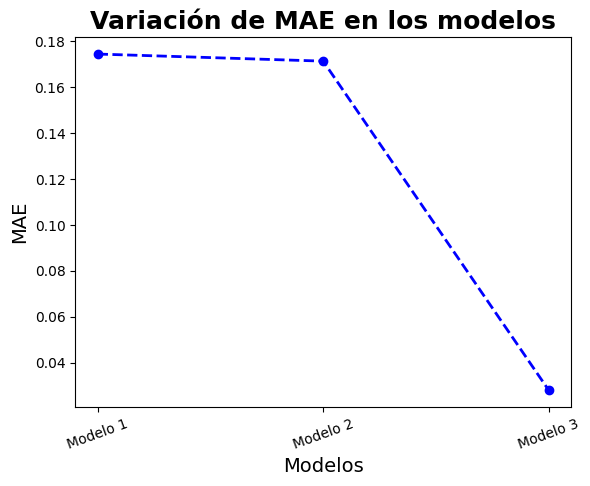

In [ ]:
plt.title("Variación de MAE en los modelos", fontsize=18, fontweight="bold")
plt.xlabel("Modelos", fontsize=14); plt.ylabel("MAE", fontsize=14)
plt.xticks([0, 1, 2], ['Modelo 1', 'Modelo 2', 'Modelo 3'], rotation=20)
plt.plot(history_mae, 'bo--', linewidth=2, markersize=6);

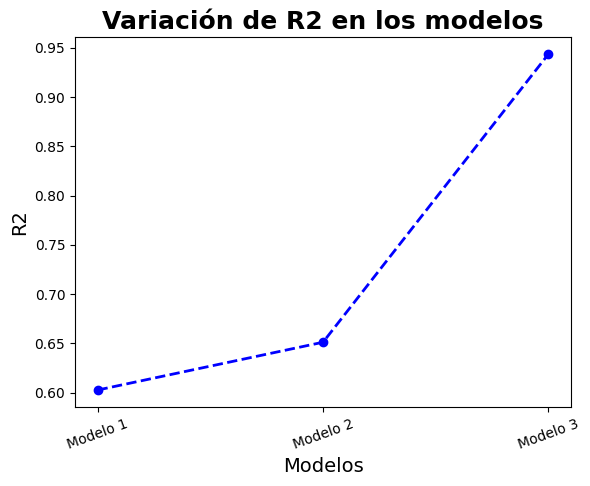

In [ ]:
plt.title("Variación de R2 en los modelos", fontsize=18, fontweight="bold")
plt.xlabel("Modelos", fontsize=14); plt.ylabel("R2", fontsize=14)
plt.xticks([0, 1, 2], ['Modelo 1', 'Modelo 2', 'Modelo 3'], rotation=20)
plt.plot(history_r2, 'bo--', linewidth=2, markersize=6);

# A continuación se realizará un análisis del úlitmo módelo predictivo pero en su forma original y una estandarizada o normalizada.

Primero vemos las variables de interes, para analizar el rango y como se comportan estos

In [ ]:
data_frame2[['RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
             'PrimaryAssaultRifle', 'PrimaryPistol', 'PrimarySniperRifle']]

,RoundStartingEquipmentValue,TeamStartingEquipmentValue,PrimaryAssaultRifle,PrimaryPistol,PrimarySniperRifle
0,750,4400,0.0,1,0.0
1,800,4400,0.0,1,0.0
2,1000,4400,0.0,1,0.0
3,850,4400,0.0,1,0.0
4,1000,4400,0.0,1,0.0
...,...,...,...,...,...
79152,5600,27100,1.0,0,0.0
79153,5500,27100,1.0,0,0.0
79154,4950,27100,1.0,0,0.0
79155,4950,27100,0.0,0,1.0


In [ ]:
data_frame2[['RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
             'PrimaryAssaultRifle', 'PrimaryPistol', 'PrimarySniperRifle']].describe()

,RoundStartingEquipmentValue,TeamStartingEquipmentValue,PrimaryAssaultRifle,PrimaryPistol,PrimarySniperRifle
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,3778.108695,18890.133532,0.675363,0.221787,0.089840
std,2111.285406,9743.203024,0.464125,0.415451,0.279797
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1600.000000,10900.000000,0.000000,0.000000,0.000000
50%,4700.000000,22550.000000,1.000000,0.000000,0.000000
75%,5200.000000,26050.000000,1.000000,0.000000,0.000000
max,8850.000000,36150.000000,1.000000,1.000000,1.000000


Con lo anterior se puede apreciar que PrimaryAssaultRifle, PrimaryPistol y PrimarySniperRifle ya estan normalizados, por lo que solamente hay que normalizar las variables de RoundStartingEquipmentValue y TeamStartingEquipmentValue.

Para esto usaremos el min-max normalization, ya que este garantiza que todas las variables se encuentren en la misma escala y sus valores se encuentren entre 0 y 1 (Al igual que las variables PrimaryXXXX).

In [ ]:
# Normalizacion de RoundStartingEquipmentValue y TeamStartingEquipmentValue con el método min-max
data_frame2['RoundStartingEquipmentValue'] = (data_frame2['RoundStartingEquipmentValue']-data_frame2['RoundStartingEquipmentValue'].min())/(data_frame2['RoundStartingEquipmentValue'].max()-data_frame2['RoundStartingEquipmentValue'].min())

data_frame2['TeamStartingEquipmentValue'] = (data_frame2['TeamStartingEquipmentValue']-data_frame2['TeamStartingEquipmentValue'].min())/(data_frame2['TeamStartingEquipmentValue'].max()-data_frame2['TeamStartingEquipmentValue'].min())

In [ ]:
data_frame2[['RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
             'PrimaryAssaultRifle', 'PrimaryPistol', 'PrimarySniperRifle']].describe()

,RoundStartingEquipmentValue,TeamStartingEquipmentValue,PrimaryAssaultRifle,PrimaryPistol,PrimarySniperRifle
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,0.426905,0.522549,0.675363,0.221787,0.089840
std,0.238563,0.269522,0.464125,0.415451,0.279797
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180791,0.301521,0.000000,0.000000,0.000000
50%,0.531073,0.623790,1.000000,0.000000,0.000000
75%,0.587571,0.720609,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Como se ve en la tabla anterior, ahora las variables que nos interesan están normalizadas, por lo que ahora se procederá a comparar un módelo normalizado con el úlitmo módelo no normalizado (el mejor módelo obtenido de la sección anterior)

In [ ]:
# Se separan las variables predictoras y la predecida
X = data_frame2[['TeamStartingEquipmentValue', 'PrimaryPistol',
                 'RoundStartingEquipmentValue', 'PrimarySniperRifle']] # Variables independientes
y = data_frame2['PrimaryAssaultRifle'] # Variable dependiente

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2, random_state=29)
# Creación de modelo
modelo_normalizado = LinearRegression()
# Entrenamiento del modelo
modelo_normalizado.fit(X_train_n, y_train_n)
# Validación del modelo
y_pred_n = modelo_normalizado.predict(X_test_n)

In [ ]:
# Evaluación del modelo no normalizado
print('Modelo no normalizado')
print("R2 : %.5f" % r2_score(y_test_y, y_pred_y))
print("MSE: %.2f" % mean_squared_error(y_pred_y, y_test_y))
print("MAE: %.2f" % mean_absolute_error(y_pred_y, y_test_y))
print("Score del modelo en entrenamiento : %.2f" % modelo_y.score(X_train_y, y_train_y))
print("Score del modelo en test : %.5f" % modelo_y.score(X_test_y, y_test_y))

# Evaluación del modelo normalizado
print('\nModelo normalizado')
print("R2 : %.5f" % r2_score(y_test_n, y_pred_n))
print("MSE: %.2f" % mean_squared_error(y_pred_n, y_test_n))
print("MAE: %.2f" % mean_absolute_error(y_pred_n, y_test_n))
print("Score del modelo en entrenamiento : %.2f" % modelo_normalizado.score(X_train_n, y_train_n))
print("Score del modelo en test : %.5f" % modelo_normalizado.score(X_test_n, y_test_n))

Modelo no normalizado
R2 : 0.94493
MSE: 0.01
MAE: 0.03
Score del modelo en entrenamiento : 0.94
Score del modelo en test : 0.94493

Modelo normalizado
R2 : 0.94493
MSE: 0.01
MAE: 0.03
Score del modelo en entrenamiento : 0.94
Score del modelo en test : 0.94493


Conclusión: En este caso, al momento de normalizar los datos este no generá ningún impacto en el resultado de ambos módelos, esto puede ser ya que alguno modelos usan el método de mínimos cuadrados, lo que produce que los coeficientes se ajusten automáticamente, teniendo en cuenta las escalas de las variables al momento de generar el módelo predictivo.


## Entrega 2

## Entrega 3